# **Experiment Notebook - XGBoostClassifier**



## Background: 
We form part of a small group of data scientists who develop various models for companies and businesses who are looking to expand their knowledge in this field, but who currently are still outsourcing these activities instead of having a fully fledged in house team of people doing this for them, or who are in the process of developing their own in house capabilities.

## The Ask: 
The newly formed data science team from one of our clients have asked us to do an independent model development and buid by making use of the same underlying dataset which they have used in order for them to do a review and establish whether their inhouse developed model and approach (steps) are sound. The client has not been prescriptive regarding certain criteria, but has given us some guidelines for us to check against as we build out our model.

The main aim of the model is to classify whether a customer will take up the sales offer or not when we cold call them, so the better we discriminate between who will be more likely to take up the offer and who will not, can help our client to better optimise their internal efforts in terms of cold calling the right customer in order to convert those calls to sales.

The secondary aim, is to overlay the revenue / cost impacts based on our classification outcomes, in order to evaluate what the estimated impact will be on the financials by executing campaigns using this model for selection purposes and what it will yield and cost us.


## Experiment:
Initial Run

### 1. Load the dataset

In [1]:
# load modules
%load_ext autoreload
%autoreload 2

In [2]:
# data libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# filter warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load data
df_explore = pd.read_csv('../data/raw/dataset.csv', delimiter = '|')

### 2. Explore the datasets

#### 2.1 Exploration

In [4]:
df_explore.head()

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_3,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,...,Feature_md_11,Feature_ed_12,Feature_dd_13,Feature_hd_14,Feature_ld_15,Feature_cd_16,Feature_md_17,Feature_dd_18,Feature_pd_19,Response
0,57,371,1,999,1,-1.8,92.893,-46.2,1.299,5099.1,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_0_n***o,Cat_2_y***s,Cat_0_c***r,Cat_6_m***y,Cat_1_m***n,Cat_0_f***e,0
1,55,285,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,Cat_1_m***d,Cat_7_u***n,Cat_1_u***n,Cat_2_y***s,Cat_0_n***o,Cat_1_t***e,Cat_6_m***y,Cat_2_t***u,Cat_1_n***t,0
2,33,52,1,999,1,-1.8,92.893,-46.2,1.313,5099.1,...,Cat_1_m***d,Cat_2_b***y,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_0_c***r,Cat_6_m***y,Cat_0_f***i,Cat_0_f***e,0
3,36,355,4,999,0,1.4,94.465,-41.8,4.967,5228.1,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_1_t***e,Cat_4_j***n,Cat_0_f***i,Cat_1_n***t,0
4,27,189,2,999,0,1.4,93.918,-42.7,4.963,5228.1,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_2_y***s,Cat_0_n***o,Cat_0_c***r,Cat_3_j***l,Cat_0_f***i,Cat_1_n***t,0


In [5]:
print('Dataset shape: ', df_explore.shape)

Dataset shape:  (35000, 21)


In [6]:
df_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Feature_ae_0   35000 non-null  int64  
 1   Feature_dn_1   35000 non-null  int64  
 2   Feature_cn_2   35000 non-null  int64  
 3   Feature_ps_3   35000 non-null  int64  
 4   Feature_ps_4   35000 non-null  int64  
 5   Feature_ee_5   35000 non-null  float64
 6   Feature_cx_6   35000 non-null  float64
 7   Feature_cx_7   35000 non-null  float64
 8   Feature_em_8   35000 non-null  float64
 9   Feature_nd_9   35000 non-null  float64
 10  Feature_jd_10  35000 non-null  object 
 11  Feature_md_11  35000 non-null  object 
 12  Feature_ed_12  35000 non-null  object 
 13  Feature_dd_13  35000 non-null  object 
 14  Feature_hd_14  35000 non-null  object 
 15  Feature_ld_15  35000 non-null  object 
 16  Feature_cd_16  35000 non-null  object 
 17  Feature_md_17  35000 non-null  object 
 18  Featur

In [7]:
df_explore.describe()

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_3,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,Response
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000
mean,40.030571,257.838400,2.562200,962.432029,0.173714,0.080749,93.575801,-40.519114,3.619979,5167.038800,0.112286
std,10.428141,258.587889,2.767424,187.012184,0.495005,1.571101,0.578557,4.619948,1.734599,72.171997,0.315722
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,318.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [8]:
df_explore[df_explore.duplicated()]

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_3,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,...,Feature_md_11,Feature_ed_12,Feature_dd_13,Feature_hd_14,Feature_ld_15,Feature_cd_16,Feature_md_17,Feature_dd_18,Feature_pd_19,Response
7217,55,33,1,999,0,1.4,93.444,-36.1,4.965,5228.1,...,Cat_1_m***d,Cat_3_h***l,Cat_1_u***n,Cat_0_n***o,Cat_0_n***o,Cat_0_c***r,Cat_1_a***g,Cat_1_m***n,Cat_1_n***t,0
13226,32,128,1,999,0,1.4,93.918,-42.7,4.968,5228.1,...,Cat_2_s***e,Cat_5_p***e,Cat_0_n***o,Cat_2_y***s,Cat_0_n***o,Cat_0_c***r,Cat_3_j***l,Cat_2_t***u,Cat_1_n***t,0
15237,35,348,4,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,Cat_1_m***d,Cat_6_u***e,Cat_0_n***o,Cat_2_y***s,Cat_0_n***o,Cat_0_c***r,Cat_6_m***y,Cat_0_f***i,Cat_1_n***t,0
22628,27,331,2,999,0,1.4,93.918,-42.7,4.962,5228.1,...,Cat_2_s***e,Cat_5_p***e,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_0_c***r,Cat_3_j***l,Cat_1_m***n,Cat_1_n***t,0
23883,71,120,1,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,Cat_2_s***e,Cat_6_u***e,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_1_t***e,Cat_8_o***t,Cat_3_t***e,Cat_1_n***t,0
25182,45,252,1,999,0,-2.9,92.469,-33.6,1.072,5076.2,...,Cat_1_m***d,Cat_6_u***e,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_0_c***r,Cat_3_j***l,Cat_2_t***u,Cat_1_n***t,1
30101,36,88,1,999,0,1.4,93.918,-42.7,4.966,5228.1,...,Cat_1_m***d,Cat_7_u***n,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_1_t***e,Cat_3_j***l,Cat_2_t***u,Cat_1_n***t,0
30802,39,124,1,999,0,1.1,93.994,-36.4,4.855,5191.0,...,Cat_1_m***d,Cat_1_b***y,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_1_t***e,Cat_6_m***y,Cat_2_t***u,Cat_1_n***t,0
31587,41,127,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,Cat_1_m***d,Cat_5_p***e,Cat_0_n***o,Cat_2_y***s,Cat_0_n***o,Cat_0_c***r,Cat_1_a***g,Cat_3_t***e,Cat_1_n***t,0
33631,47,43,3,999,0,1.4,93.918,-42.7,4.962,5228.1,...,Cat_0_d***d,Cat_3_h***l,Cat_0_n***o,Cat_2_y***s,Cat_0_n***o,Cat_0_c***r,Cat_3_j***l,Cat_2_t***u,Cat_1_n***t,0


In [9]:
df_explore[(df_explore['Feature_ae_0'] == 55) & (df_explore['Feature_dn_1'] == 33)]

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_3,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,...,Feature_md_11,Feature_ed_12,Feature_dd_13,Feature_hd_14,Feature_ld_15,Feature_cd_16,Feature_md_17,Feature_dd_18,Feature_pd_19,Response
6927,55,33,1,999,0,1.4,93.444,-36.1,4.965,5228.1,...,Cat_1_m***d,Cat_3_h***l,Cat_1_u***n,Cat_0_n***o,Cat_0_n***o,Cat_0_c***r,Cat_1_a***g,Cat_1_m***n,Cat_1_n***t,0
7217,55,33,1,999,0,1.4,93.444,-36.1,4.965,5228.1,...,Cat_1_m***d,Cat_3_h***l,Cat_1_u***n,Cat_0_n***o,Cat_0_n***o,Cat_0_c***r,Cat_1_a***g,Cat_1_m***n,Cat_1_n***t,0


There are 21 counts of duplicate records. Will remove as it will affect the learning of the model.

In [10]:
# df_explore['is_duplicate'] = df_explore.duplicated().astype('int')
df_explore = df_explore[~df_explore.duplicated()]

In [11]:
df_explore.head()

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_3,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,...,Feature_md_11,Feature_ed_12,Feature_dd_13,Feature_hd_14,Feature_ld_15,Feature_cd_16,Feature_md_17,Feature_dd_18,Feature_pd_19,Response
0,57,371,1,999,1,-1.8,92.893,-46.2,1.299,5099.1,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_0_n***o,Cat_2_y***s,Cat_0_c***r,Cat_6_m***y,Cat_1_m***n,Cat_0_f***e,0
1,55,285,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,Cat_1_m***d,Cat_7_u***n,Cat_1_u***n,Cat_2_y***s,Cat_0_n***o,Cat_1_t***e,Cat_6_m***y,Cat_2_t***u,Cat_1_n***t,0
2,33,52,1,999,1,-1.8,92.893,-46.2,1.313,5099.1,...,Cat_1_m***d,Cat_2_b***y,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_0_c***r,Cat_6_m***y,Cat_0_f***i,Cat_0_f***e,0
3,36,355,4,999,0,1.4,94.465,-41.8,4.967,5228.1,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_1_t***e,Cat_4_j***n,Cat_0_f***i,Cat_1_n***t,0
4,27,189,2,999,0,1.4,93.918,-42.7,4.963,5228.1,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_2_y***s,Cat_0_n***o,Cat_0_c***r,Cat_3_j***l,Cat_0_f***i,Cat_1_n***t,0


In [12]:
df_explore.shape

(34989, 21)

#### 2.2 Preprocessing

In [13]:
# category columns
cat_cols = ['Feature_jd_10', 'Feature_md_11', 'Feature_ed_12', 'Feature_dd_13', 'Feature_hd_14', 'Feature_ld_15', 'Feature_cd_16', 'Feature_md_17',
           'Feature_dd_18', 'Feature_pd_19']

# cols to drop
# drop_cols = ['Time']

In [14]:
# df_explore.drop(drop_cols, axis=1, inplace=True)

In [15]:
df_explore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34989 entries, 0 to 34999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Feature_ae_0   34989 non-null  int64  
 1   Feature_dn_1   34989 non-null  int64  
 2   Feature_cn_2   34989 non-null  int64  
 3   Feature_ps_3   34989 non-null  int64  
 4   Feature_ps_4   34989 non-null  int64  
 5   Feature_ee_5   34989 non-null  float64
 6   Feature_cx_6   34989 non-null  float64
 7   Feature_cx_7   34989 non-null  float64
 8   Feature_em_8   34989 non-null  float64
 9   Feature_nd_9   34989 non-null  float64
 10  Feature_jd_10  34989 non-null  object 
 11  Feature_md_11  34989 non-null  object 
 12  Feature_ed_12  34989 non-null  object 
 13  Feature_dd_13  34989 non-null  object 
 14  Feature_hd_14  34989 non-null  object 
 15  Feature_ld_15  34989 non-null  object 
 16  Feature_cd_16  34989 non-null  object 
 17  Feature_md_17  34989 non-null  object 
 18  Feature_dd_

### 3. Explore Target variable

In [16]:
target = 'Response'

In [17]:
df_explore[target].value_counts()

Response
0    31060
1     3929
Name: count, dtype: int64

In [18]:
df_explore[target].value_counts(normalize=True)

Response
0    0.887708
1    0.112292
Name: proportion, dtype: float64

<Axes: xlabel='Response', ylabel='count'>

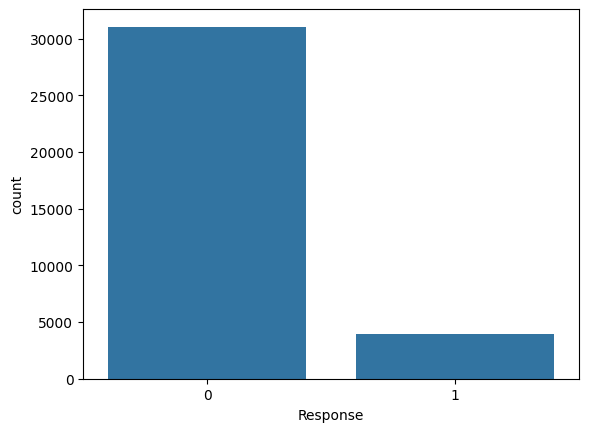

In [19]:
sns.countplot(x=target, data=df_explore, order=df_explore[target].value_counts(ascending=False).index)

### 4. Explore Features

#### Categorical Features v Target

In [20]:
def plot_categ_feats(feat, df, target, th):
    fig, ax = plt.subplots(1,2,figsize=(10,5))
    ax = ax.flatten()
    
    df_counts = df.groupby([feat, target]).size().reset_index(name='counts')
    df_pivot = df_counts.pivot_table(index=feat ,columns=target, aggfunc='sum', fill_value=0, margins=True)
    df_pcnt = df_pivot.div(df_pivot.iloc[:,-1], axis=0)
    
    value_filter = df_pcnt[('counts',1)] >= th
    df_pcnt_filtered = df_pcnt[value_filter].loc[:,('counts',1)].sort_values(ascending=False).drop('All')
    sns.barplot(x=df_pcnt_filtered.index,y=df_pcnt_filtered.values, color='orange',ax=ax[0])
    
    df_cnts_filtered = df[feat].value_counts(ascending=False).filter(items = df_pcnt[value_filter].index).reindex(df_pcnt_filtered.index)
    sns.barplot(x=df_cnts_filtered.index,y=df_cnts_filtered.values, color='gray', ax=ax[1])
    
    ax[0].tick_params(axis='x', labelrotation=50)
    ax[1].tick_params(axis='x', labelrotation=50)
    
    ax[0].set_title('Pcnt of propensity per ' + feat)
    ax[1].set_title('Number of propensity per ' + feat)
    plt.show()

    return df_cnts_filtered

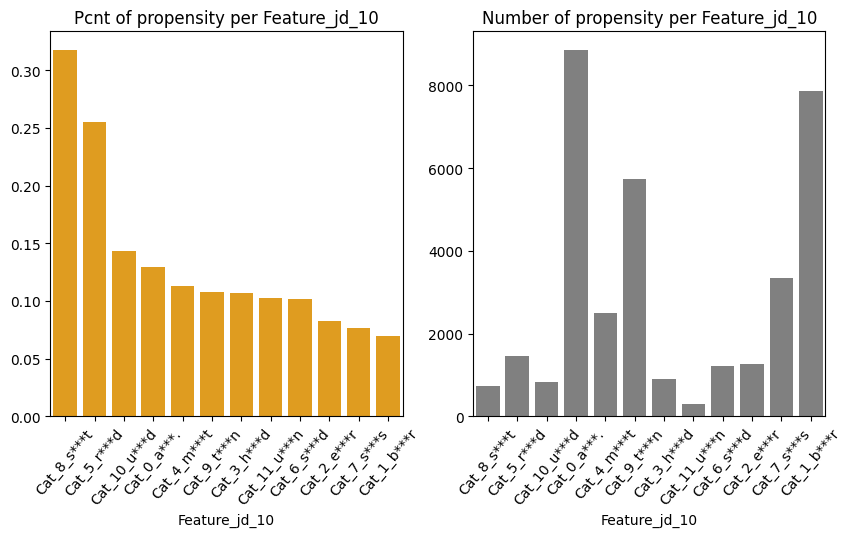

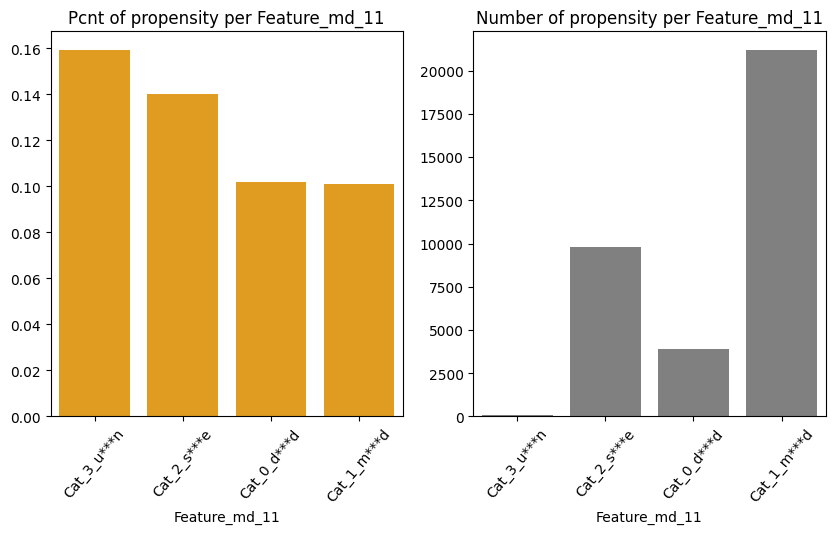

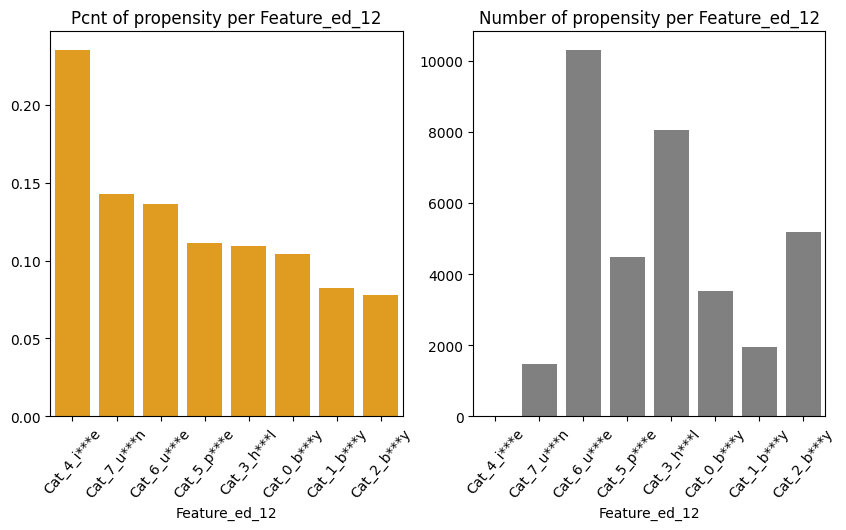

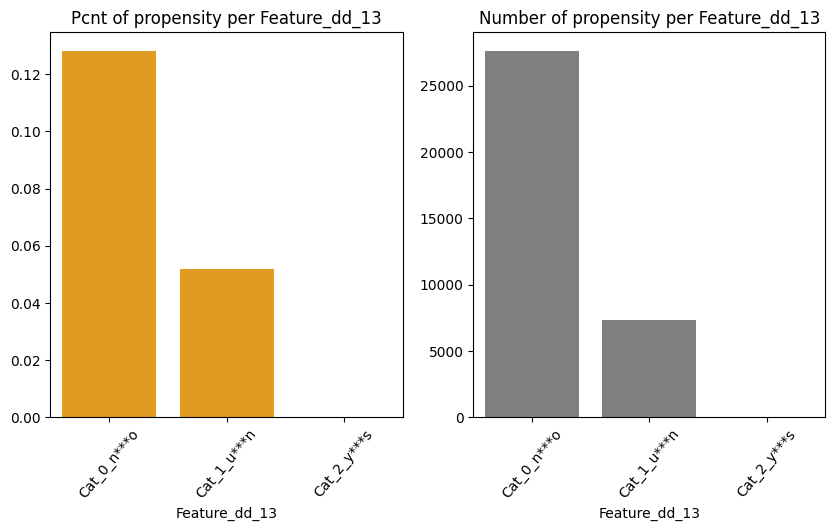

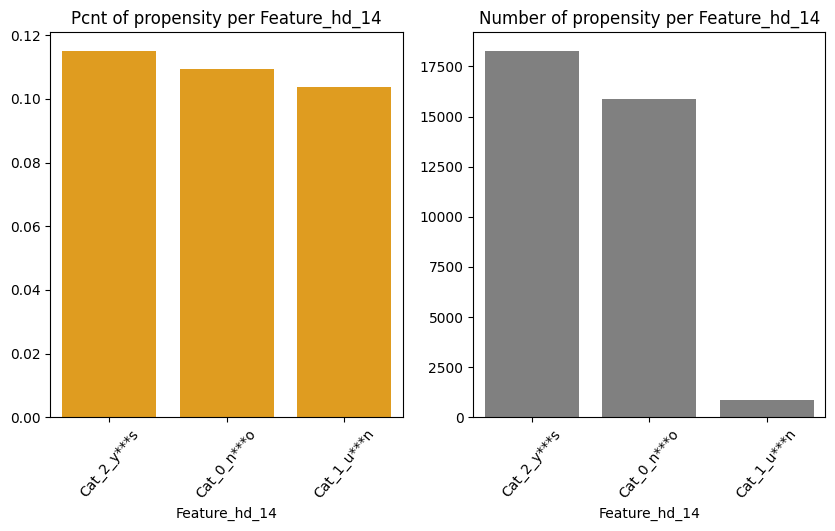

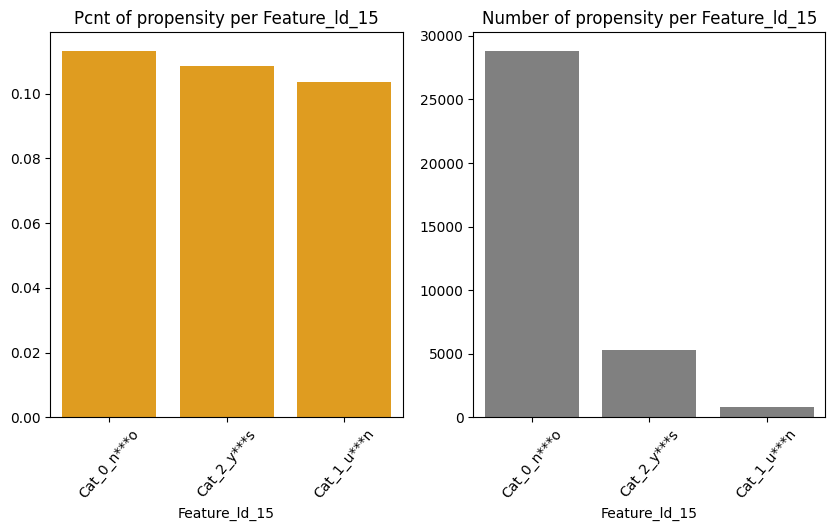

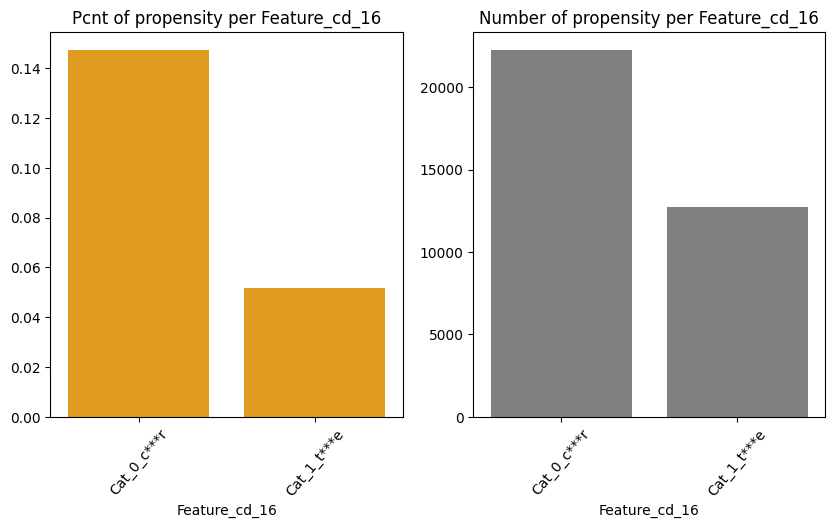

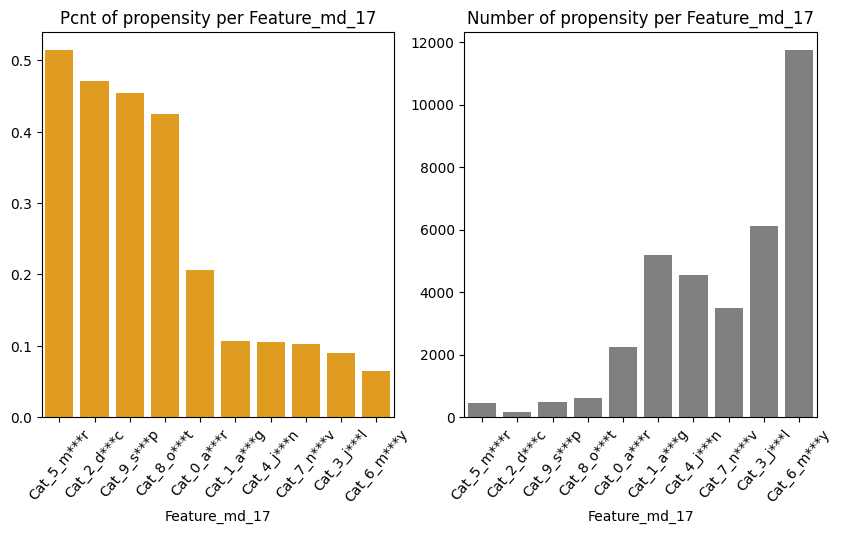

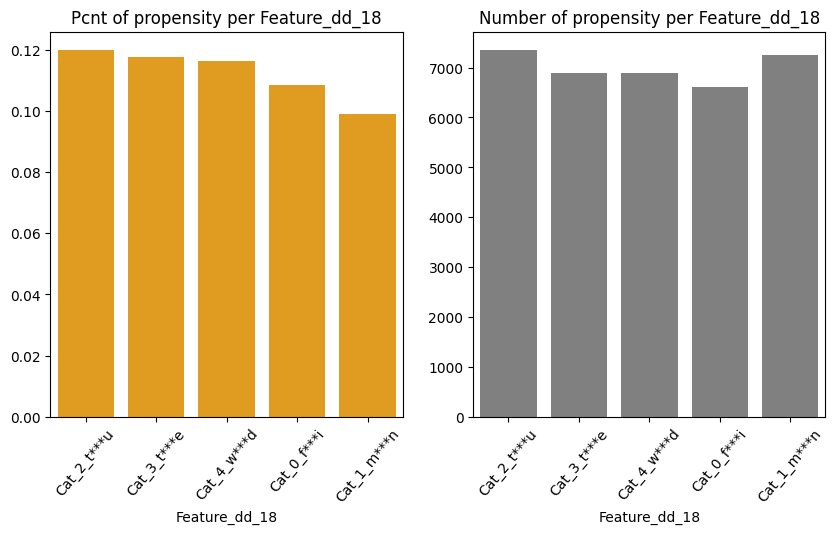

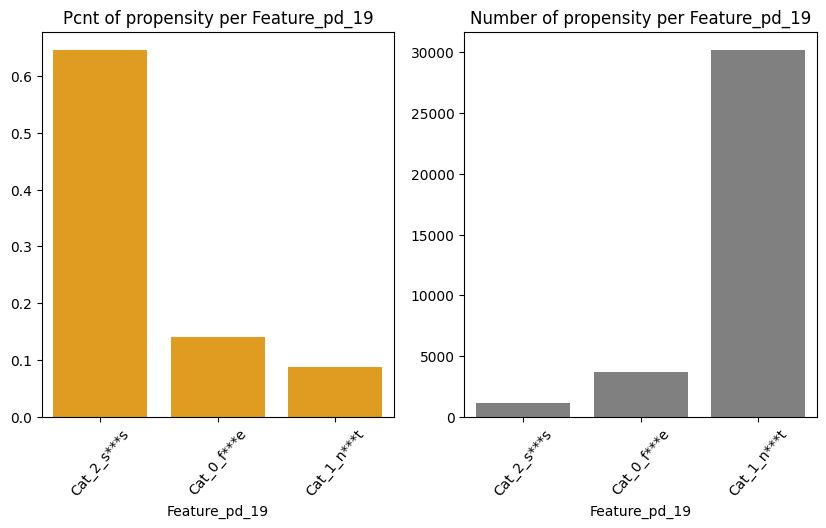

In [21]:
## [Feature Exploration]
## 
for col in cat_cols: 
    _ = plot_categ_feats(col, df_explore, target, 0)

#### Numerical Features v Target

In [22]:
num_cols = [x for x in df_explore.columns if x not in cat_cols + [target]]

In [23]:
len(num_cols)

10

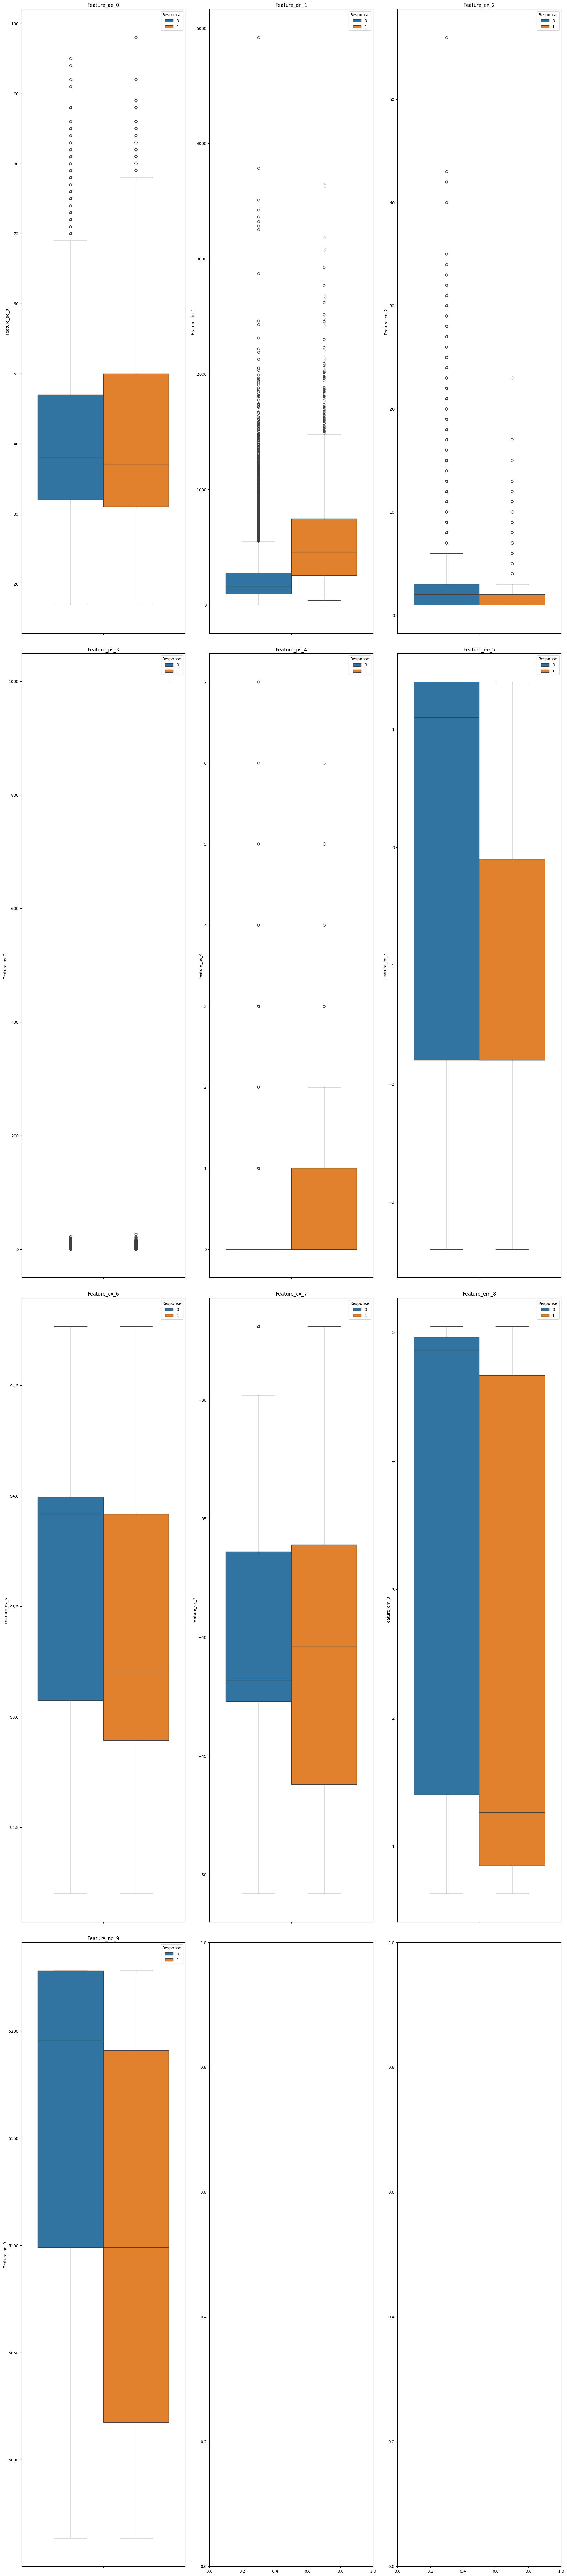

In [24]:
fig, ax = plt.subplots(int(len(num_cols)/3)+1, 3, figsize=(20,90))
ax = ax.flatten()
plt.tight_layout(pad=3)

for idx,col in enumerate(num_cols):
    sns.boxplot(y=col, hue=target, data=df_explore, ax=ax[idx])
    ax[idx].set_title(col)

plt.show()

#### Mann-Whitney U test

In [25]:
import scipy.stats as stats

In [26]:
# test
th = 0.05
for col in num_cols:
    res = 'fail to reject'
    pval = stats.mannwhitneyu(df_explore[df_explore[target] == 0][col], df_explore[df_explore[target] == 1][col], alternative='two-sided')[1]
    if pval < th:
        res = 'reject'
    print(f'The pvalue for {col} is {pval}. We {res} the null.')

The pvalue for Feature_ae_0 is 0.02641820260167359. We reject the null.
The pvalue for Feature_dn_1 is 0.0. We reject the null.
The pvalue for Feature_cn_2 is 1.2743073263540704e-32. We reject the null.
The pvalue for Feature_ps_3 is 0.0. We reject the null.
The pvalue for Feature_ps_4 is 3.3292872088346e-298. We reject the null.
The pvalue for Feature_ee_5 is 0.0. We reject the null.
The pvalue for Feature_cx_6 is 2.7215460698930196e-116. We reject the null.
The pvalue for Feature_cx_7 is 1.8925800601080175e-14. We reject the null.
The pvalue for Feature_em_8 is 0.0. We reject the null.
The pvalue for Feature_nd_9 is 0.0. We reject the null.


Based on the test, we can consider removing V13, V15, and V22.

### 5. Data Preparation

In [27]:
# # create dummy variables and concat
dummies_df = []
for var in cat_cols:
    dummies_df.append(pd.get_dummies(df_explore[var], drop_first=True, prefix=var, dtype=float))

df = pd.concat([df_explore, pd.concat(dummies_df, axis=1)], axis=1)
df.drop(cat_cols, axis=1, inplace=True)

In [28]:
df.head()

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_3,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,...,Feature_md_17_Cat_6_m***y,Feature_md_17_Cat_7_n***v,Feature_md_17_Cat_8_o***t,Feature_md_17_Cat_9_s***p,Feature_dd_18_Cat_1_m***n,Feature_dd_18_Cat_2_t***u,Feature_dd_18_Cat_3_t***e,Feature_dd_18_Cat_4_w***d,Feature_pd_19_Cat_1_n***t,Feature_pd_19_Cat_2_s***s
0,57,371,1,999,1,-1.8,92.893,-46.2,1.299,5099.1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,55,285,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,33,52,1,999,1,-1.8,92.893,-46.2,1.313,5099.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,355,4,999,0,1.4,94.465,-41.8,4.967,5228.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27,189,2,999,0,1.4,93.918,-42.7,4.963,5228.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34989 entries, 0 to 34999
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Feature_ae_0                34989 non-null  int64  
 1   Feature_dn_1                34989 non-null  int64  
 2   Feature_cn_2                34989 non-null  int64  
 3   Feature_ps_3                34989 non-null  int64  
 4   Feature_ps_4                34989 non-null  int64  
 5   Feature_ee_5                34989 non-null  float64
 6   Feature_cx_6                34989 non-null  float64
 7   Feature_cx_7                34989 non-null  float64
 8   Feature_em_8                34989 non-null  float64
 9   Feature_nd_9                34989 non-null  float64
 10  Response                    34989 non-null  int64  
 11  Feature_jd_10_Cat_10_u***d  34989 non-null  float64
 12  Feature_jd_10_Cat_11_u***n  34989 non-null  float64
 13  Feature_jd_10_Cat_1_b***r   34989 no

In [30]:
# computing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
# df_VIF = df.drop(target, axis=1)

# vif_drop_cols = []
vif_threshold = 5

# finished = False
# while not finished: # rerun each analysis while dropping the max VIF feature among those greater than 5
# the independent variables set
X = df.drop(target, axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

# calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# count features with greater than 5 vif
# vif_count = len(vif_data[vif_data['VIF'] >= vif_threshold])
# if vif_count == 0:
#     finished = True
# else:
#     vif_feature = vif_data[vif_data['VIF'] == vif_data['VIF'].max()]['feature'].values[0]
#     vif_drop_cols.append(vif_feature)

In [32]:
vif_data[vif_data['VIF'] >= vif_threshold]

,feature,VIF
0,Feature_ae_0,2.654708e+01
3,Feature_ps_3,3.282199e+02
4,Feature_ps_4,6.783525e+00
5,Feature_ee_5,9.352551e+01
6,Feature_cx_6,6.472951e+04
7,Feature_cx_7,3.924995e+02
8,Feature_em_8,7.868953e+02
9,Feature_nd_9,8.186508e+04
21,Feature_md_11_Cat_1_m***d,6.601293e+00
29,Feature_ed_12_Cat_6_u***e,5.917317e+00


In [33]:
multicol_to_drop = vif_data[vif_data['VIF'] >= vif_threshold]['feature'].values
multicol_to_drop

array(['Feature_ae_0', 'Feature_ps_3', 'Feature_ps_4', 'Feature_ee_5',
       'Feature_cx_6', 'Feature_cx_7', 'Feature_em_8', 'Feature_nd_9',
       'Feature_md_11_Cat_1_m***d', 'Feature_ed_12_Cat_6_u***e',
       'Feature_hd_14_Cat_1_u***n', 'Feature_ld_15_Cat_1_u***n',
       'Feature_cd_16_Cat_1_t***e', 'Feature_md_17_Cat_1_a***g',
       'Feature_md_17_Cat_3_j***l', 'Feature_md_17_Cat_6_m***y',
       'Feature_pd_19_Cat_1_n***t', 'Feature_pd_19_Cat_2_s***s'],
      dtype=object)

In [34]:
print(len(multicol_to_drop), ' features to drop')

18  features to drop


In [35]:
# # dropping multicollinearity columns
df = df.drop(multicol_to_drop, axis=1)
df.shape

(34989, 36)

### 6. Splitting Dataset

In [36]:
X = df.drop(target, axis=1)
y = df[target]

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

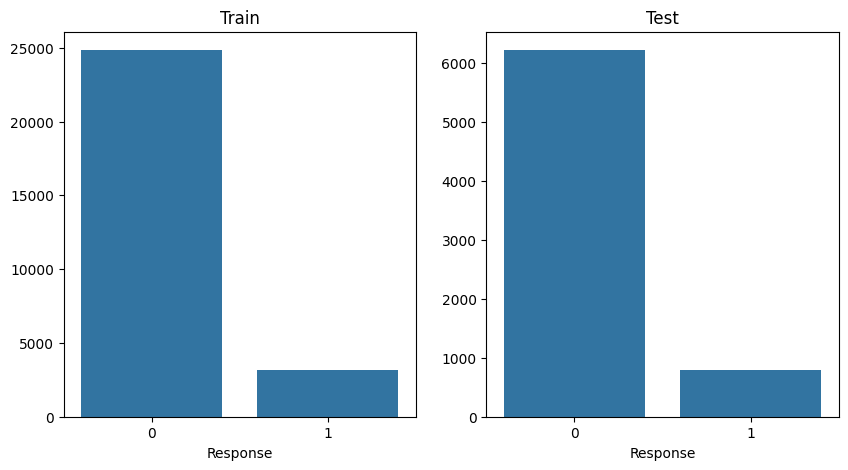

In [38]:
# checking distributions of the resulting train, and test sets
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax = ax.flatten()

y_train_cnts = y_train.value_counts()
y_test_cnts = y_test.value_counts()

sns.barplot(x=y_train_cnts.index, y=y_train_cnts.values, ax=ax[0])
sns.barplot(x=y_test_cnts.index, y=y_test_cnts.values, ax=ax[1])

ax[0].set_title('Train')
ax[1].set_title('Test')

plt.show()

In [39]:
y_train_cnts

Response
0    24848
1     3143
Name: count, dtype: int64

In [40]:
y_test_cnts

Response
0    6212
1     786
Name: count, dtype: int64

### 7. Baseline Model

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, \
    roc_auc_score, roc_curve, RocCurveDisplay

In [42]:
# creating baseline predictions with the same shape as the train set
train_baseline_preds = np.full(y_train.shape, y_train.mode())

In [43]:
def display_classifier_scores(y_actuals, y_preds):
    """Evaluating accuracy, precision, recall, and F1

    Parameters
    ----------
    y_preds : Numpy Array
        Predicted target
    y_actuals : Numpy Array
        Actual target

    Returns
    -------
    Display everything onto a dataframe
    """

    dict_eval_metrics = {'accuracy': accuracy_score,
                 'precision': precision_score,
                 'recall': recall_score,
                 'f1': f1_score,
                 'roc_auc': roc_auc_score
                }

    list_scores = [scorer(y_actuals, y_preds) for scorer in dict_eval_metrics.values()]
    display(pd.DataFrame(list_scores, index=dict_eval_metrics.keys(), columns=['Results']))

In [44]:
# displaying typical classification metrics
display_classifier_scores(y_actuals=y_train, y_preds=train_baseline_preds)

,Results
accuracy,0.887714
precision,0.000000
recall,0.000000
f1,0.000000
roc_auc,0.500000


In [45]:
def plot_confusion_matrix(y_actuals, y_preds):
    """Displaying confusion matrix

    Parameters
    ----------
    y_actuals : Numpy Array
        Actual target
    y_preds : Numpy Array
        Predicted target 

    Returns
    -------
    """
    cm = confusion_matrix(y_actuals, y_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

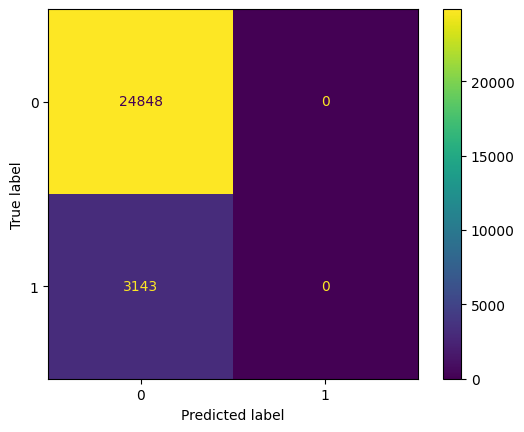

In [46]:
# plotting confusion matrix
plot_confusion_matrix(y_actuals=y_train, y_preds=train_baseline_preds)

Resulting to high accuracy scores, but scoring 0 on precision, recall, and F1 scores. This is expected since the majority class is 0 and the baseline model is predicting only 0.

### 8. Train Machine Learning Model

In [47]:
import xgboost as xgb

In [48]:
# choosing initial scale to account for imbalance (# of negative classes / # of positive classes)
scale_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

print('Scale class weight: ', scale_weight)

# initialize model
model = xgb.XGBClassifier(scale_pos_weight = scale_weight, eval_metric=roc_auc_score, booster='gbtree', random_state=10)

Scale class weight:  7.905822462615336


### 9. Assess Model Performance

In [49]:
# KFold cross validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

# Doing 5 splits
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

dict_eval_metrics = {'accuracy': accuracy_score,
             'precision': precision_score,
             'recall': recall_score,
             'f1': f1_score,
             'roc_auc': roc_auc_score
            }

def evaluate_cv_predictions(X, y, model):
  """
  function to display mean, std, and median cross validation scores
  """
  fig, ax = plt.subplots(1,len(dict_eval_metrics), figsize = (20,5))
  plt.tight_layout(pad=2)
  ax = ax.flatten()

  score_list_mean = []
  score_list_std = []
  score_list_median = []

  for idx,key in enumerate(dict_eval_metrics.keys()):
    scores = cross_val_score(model, X, y, scoring=key, cv=cv, n_jobs=-1)

    sns.boxplot(scores, ax=ax[idx])
    ax[idx].set_title(key)

    score_list_mean.append(np.mean(scores))
    score_list_std.append(np.std(scores))
    score_list_median.append(np.median(scores))

  display(pd.DataFrame({'Mean':score_list_mean, 'STD':score_list_std, 'Median':score_list_median}, index=dict_eval_metrics.keys()))
  plt.show()

,Mean,STD,Median
accuracy,0.826123,0.005979,0.826545
precision,0.366816,0.011655,0.368984
recall,0.754372,0.017743,0.767886
f1,0.493580,0.013894,0.498709
roc_auc,0.877471,0.008894,0.876898


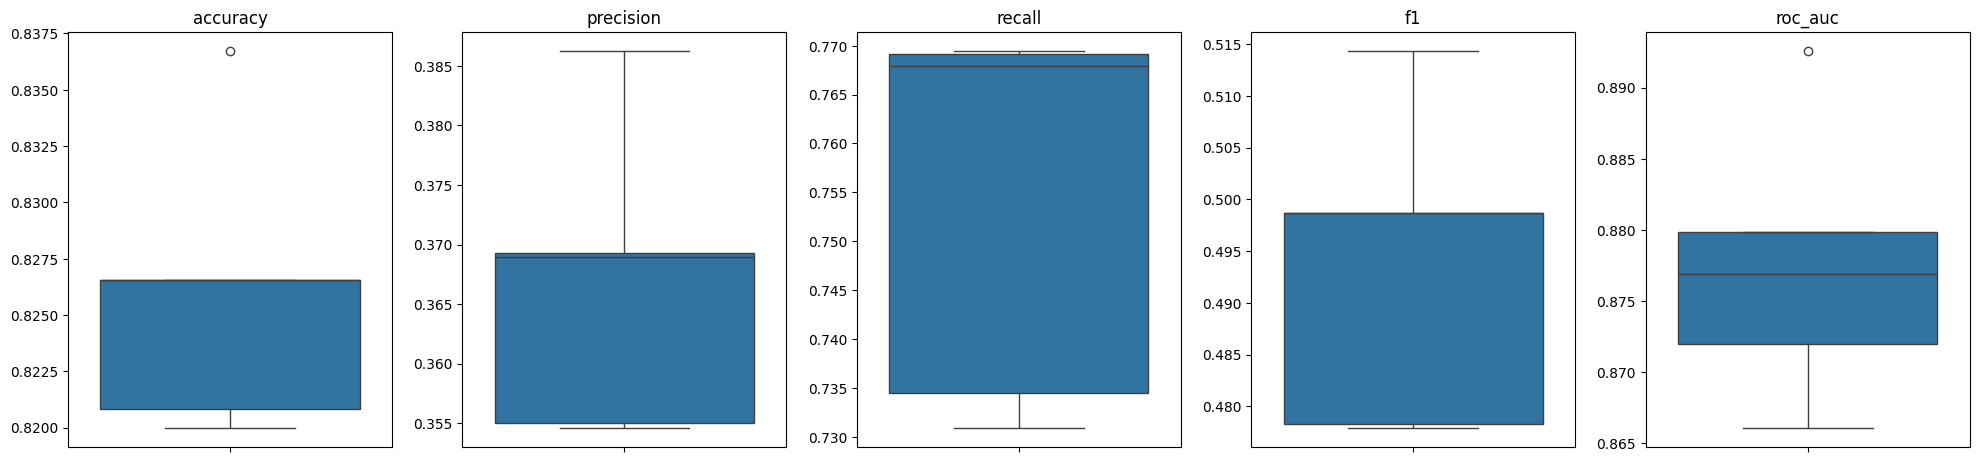

In [50]:
# scores for training
evaluate_cv_predictions(X_train, y_train, model)

Recall is the more important metric for this case. Business priority is to determine fraud, but also has leeway to raise false alarms (false positives).

In [51]:
# generate cross validation predictions for training data
y_cv_probs = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')[:,1]
y_cv_preds = (y_cv_probs >= 0.5).astype(int)

In [52]:
# checking pred values
print(y_cv_preds)

[0 0 0 ... 1 0 0]


In [53]:
# checking probability values
print(y_cv_probs)

[9.9098347e-02 7.3070275e-03 7.9151131e-03 ... 9.8120421e-01 2.1603920e-02
 1.9948038e-04]


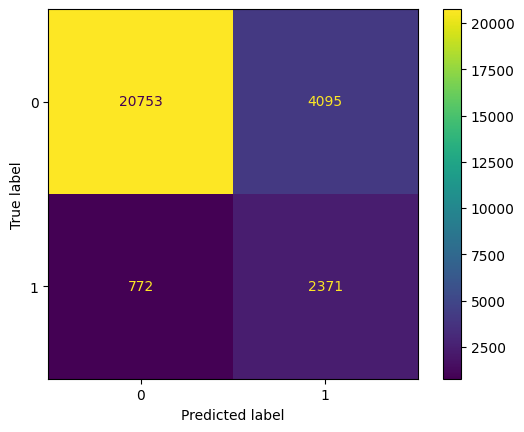

In [54]:
plot_confusion_matrix(y_actuals=y_train, y_preds=y_cv_preds)

The initial model has high recall, given that the initial scale was high. This is also a good sign given that the initial model is able to predict positive classes that are only less than 0.1% of the whole distribution.

In [55]:
def plot_rocauc_curve(y_actuals, y_probs):
    """Displaying rocauc Curve

    Parameters
    ----------
    y_actuals : Numpy Array
        Actual target
    y_probs : Numpy Array
        Predicted target probabilities

    Returns
    -------
    """
    print('ROCAUC score: {:.4f}'.format(roc_auc_score(y_actuals, y_probs)))

    fpr, tpr, _ = roc_curve(y_actuals, y_probs)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0.5, 0.5], color = 'g', linestyle='--')
    plt.show()

ROCAUC score: 0.8773


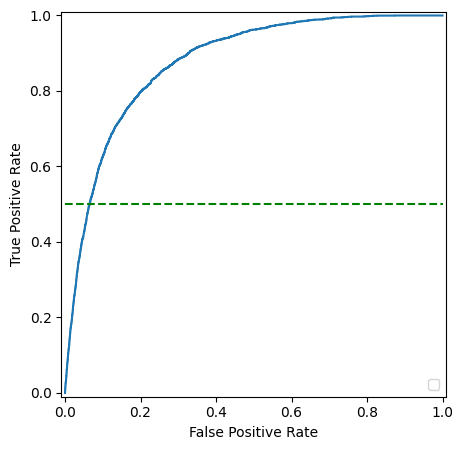

In [56]:
plot_rocauc_curve(y_actuals=y_train, y_probs=y_cv_probs)

### 10. Hyperparameter Tuning

In [57]:
from hyperopt import fmin, tpe, hp, anneal, Trials

In [58]:
# defining optimisation function
def xgb_rocauc_cv(params, random_state=10, cv=cv, X=X_train, y=y_train):
    params = {
              'max_depth': int(params['max_depth']), 
             'scale_pos_weight': np.log(params['scale_pos_weight']),
             'learning_rate': np.log(params['learning_rate']),
             'n_estimators': int(params['n_estimators']),
             # 'subsample': np.log(params['subsample']),
             'reg_lambda': np.log(params['reg_lambda']),
             'reg_alpha': np.log(params['reg_alpha']),
             'min_child_weight': int(params['min_child_weight'])                          
    }
    
    model = xgb.XGBClassifier(eval_metric=roc_auc_score, booster='gbtree', random_state=10, **params)
    
    score = -cross_val_score(model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1).mean()

    return score

In [61]:
%%time

n_iter=20 # limiting to twenty iterations for resource purposes

# possible values of parameters
space = {
       'max_depth' : hp.quniform('max_depth', 5, 20, 1),
       'scale_pos_weight': hp.loguniform('scale_pos_weight', 1, 100),
       'n_estimators': hp.quniform('n_estimators', 100, 300, 1),
       'learning_rate': hp.loguniform('learning_rate', 1e-2, 0.2),
       # 'subsample': hp.loguniform('subsample', 0.7, 0.9),
       'reg_lambda': hp.loguniform('reg_lambda', 1e-1, 100),
       'reg_alpha': hp.loguniform('reg_alpha', 1e-1, 100),
       'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1) 
      }

# trials will contain logging information
trials = Trials()

best=fmin(fn=xgb_rocauc_cv, # function to optimize
          space=space, 
          algo=tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals=n_iter, # maximum number of iterations
          trials=trials, # logging
          rstate=np.random.default_rng(10) # fixing random state for the reproducibility
         )

print("Best AUCPR {:.3f} params {}".format(xgb_rocauc_cv(best), best))

100%|███████████████████████████████████████████████| 20/20 [00:50<00:00,  2.55s/trial, best loss: -0.8901130260366535]
Best AUCPR -0.890 params {'learning_rate': np.float64(1.096504726337658), 'max_depth': np.float64(10.0), 'min_child_weight': np.float64(6.0), 'n_estimators': np.float64(218.0), 'reg_alpha': np.float64(8.294485088913479e+28), 'reg_lambda': np.float64(4.534636810692791e+20), 'scale_pos_weight': np.float64(9048370409.663708)}
CPU times: total: 1.88 s
Wall time: 52.7 s


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

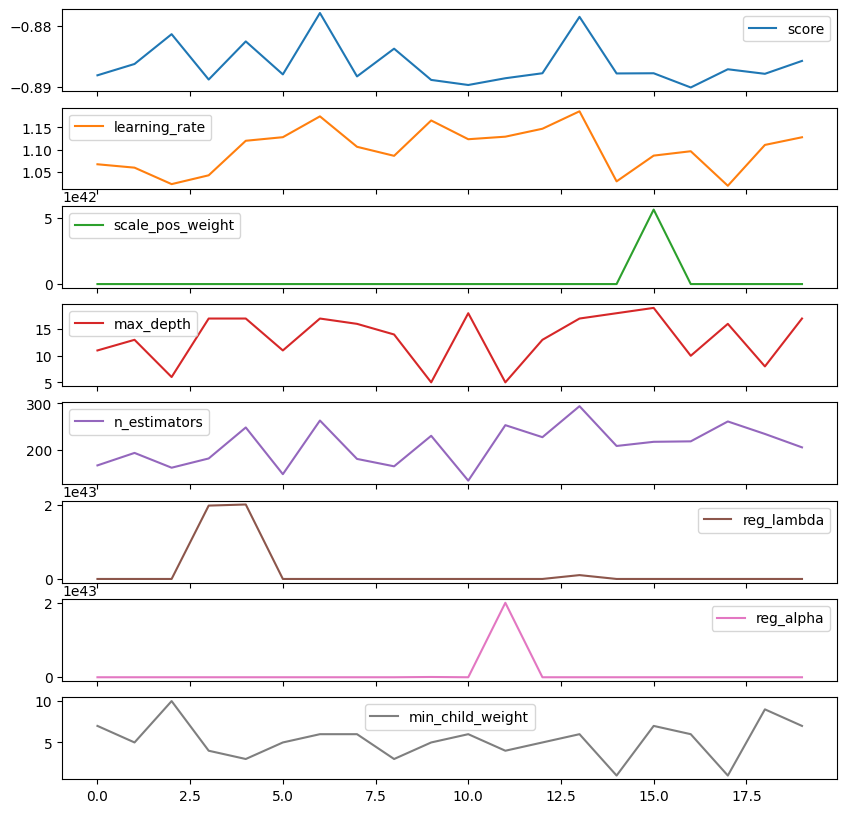

In [62]:
tpe_results=np.array([[x['result']['loss'],
                      x['misc']['vals']['learning_rate'][0],
                       x['misc']['vals']['scale_pos_weight'][0],
                      x['misc']['vals']['max_depth'][0],
                       x['misc']['vals']['n_estimators'][0],
                      # x['misc']['vals']['subsample'][0],
                       x['misc']['vals']['reg_lambda'][0],
                       x['misc']['vals']['reg_alpha'][0],
                       x['misc']['vals']['min_child_weight'][0]
                      ] for x in trials.trials])

tpe_results_df=pd.DataFrame(tpe_results,
                           columns=['score', 
                                    'learning_rate', 
                                    'scale_pos_weight', 
                                    'max_depth', 
                                    'n_estimators',
                                    # 'subsample', 
                                    'reg_lambda', 
                                    'reg_alpha',
                                    'min_child_weight'])
tpe_results_df.plot(subplots=True,figsize=(10, 10))

In [63]:
best_t = best.copy()
best_t['max_depth'] = int(best['max_depth'])
best_t['n_estimators'] = int(best['n_estimators'])
# best_t['subsample'] = np.log(best['subsample'])
best_t['learning_rate'] = np.log(best['learning_rate'])
best_t['reg_lambda'] = np.log(best['reg_lambda'])
best_t['reg_alpha'] = np.log(best['reg_alpha'])
best_t['min_child_weight'] = int(best['min_child_weight'])
best_t['scale_pos_weight'] = np.log(best['scale_pos_weight'])
best_t

{'learning_rate': np.float64(0.09212759925197711),
 'max_depth': 10,
 'min_child_weight': 6,
 'n_estimators': 218,
 'reg_alpha': np.float64(66.58797345067416),
 'reg_lambda': np.float64(47.56344685439594),
 'scale_pos_weight': np.float64(22.925850513214026)}

In [64]:
# generate cross validation predictions for training data
print('[Optimised Train Results]')

model_opt = xgb.XGBClassifier(eval_metric=roc_auc_score, booster='gbtree', random_state=10, **best_t)

[Optimised Train Results]


[Optimised Train Results]


,Mean,STD,Median
accuracy,0.672752,0.004891,0.671490
precision,0.247064,0.003831,0.245409
recall,0.934774,0.008374,0.934817
f1,0.390826,0.005469,0.388760
roc_auc,0.890113,0.007530,0.887105


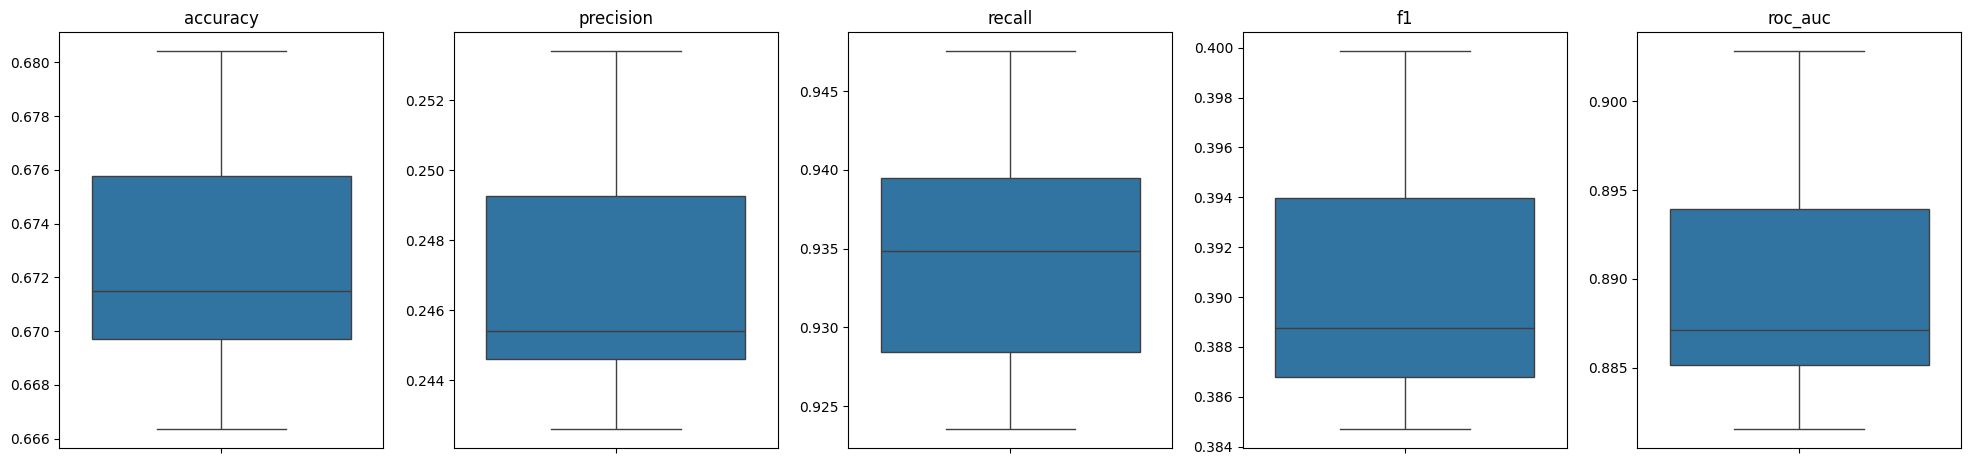

In [65]:
# generate cross validation predictions for training data
y_cv_opt_probs = cross_val_predict(model_opt, X_train, y_train, cv=cv, method='predict_proba')[:,1]
y_cv_opt_preds = (y_cv_opt_probs >= 0.5).astype(int)

print('[Optimised Train Results]')
evaluate_cv_predictions(X_train, y_train, model_opt)

In [66]:
for th in range(1,11):
    th = th / 10
    y_pred_th = (y_cv_opt_probs > th).astype(int)
    acc = accuracy_score(y_train, y_pred_th)
    prec = precision_score(y_train, y_pred_th)
    rec = recall_score(y_train, y_pred_th)
    f1 = f1_score(y_train,y_pred_th)
    print(f"Threshold: {th} - Acc: {acc}; Precision: {prec}; Recall: {rec}; F1: {f1}")

Threshold: 0.1 - Acc: 0.394126683576864; Precision: 0.15570175438596492; Recall: 0.9939548202354438; F1: 0.26922911190589044
Threshold: 0.2 - Acc: 0.4952306098388768; Precision: 0.18045375218150086; Recall: 0.9869551384027999; F1: 0.30511975606157477
Threshold: 0.3 - Acc: 0.5626094101675538; Precision: 0.20105124835742444; Recall: 0.9735921094495704; F1: 0.3332788760006535
Threshold: 0.4 - Acc: 0.6205923332499732; Precision: 0.2228893336298273; Recall: 0.9567292395800191; F1: 0.36154863532523746
Threshold: 0.5 - Acc: 0.6727519559858526; Precision: 0.2470360716387791; Recall: 0.9347756920139993; F1: 0.3907954243149774
Threshold: 0.6 - Acc: 0.7238040798828195; Precision: 0.2754942258759053; Recall: 0.895641107222399; F1: 0.4213756455355138
Threshold: 0.7 - Acc: 0.7783573291415098; Precision: 0.3181224004753416; Recall: 0.8517340120903595; F1: 0.4632289323412355
Threshold: 0.8 - Acc: 0.8318030795612875; Precision: 0.3780202650038971; Recall: 0.7715558383709832; F1: 0.5074283322870894
Thre

Confusion Matrix - Optimised Params


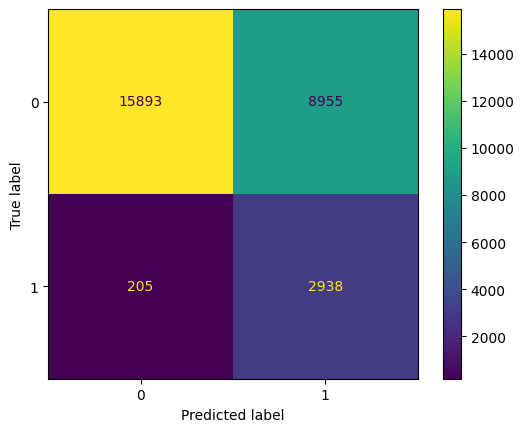

In [67]:
print('Confusion Matrix - Optimised Params')
plot_confusion_matrix(y_actuals=y_train, y_preds=y_cv_opt_preds)

ROC AUC Curves - Optimised Params
ROCAUC score: 0.8899


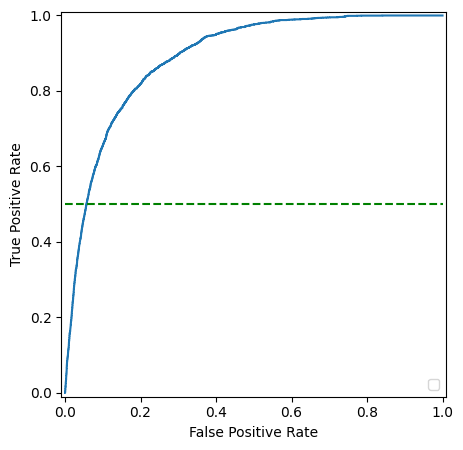

In [68]:
print('ROC AUC Curves - Optimised Params')
plot_rocauc_curve(y_actuals=y_train, y_probs=y_cv_opt_probs)

In conclusion, the test evaluations, after hyperparameter tuning as well as classification threshold tuning, show that the model is able to properly distinguish between the two classes, for unseen data. Given that it has satisfied the business requirements, strong considerations to deploy is recommended.

### 11. Predict Test Set Probabilities

In [69]:
y_cv_test_probs = cross_val_predict(model_opt, X_test, y_test, cv=cv, method='predict_proba')[:,1]
y_cv_test_preds = (y_cv_test_probs >= 0.5).astype(int)

In [70]:
# computing the score on the test set
display_classifier_scores(y_actuals=y_test, y_preds=y_cv_test_preds)

,Results
accuracy,0.652043
precision,0.234631
recall,0.927481
f1,0.374518
roc_auc,0.772337


Confusion Matrix - Optimised Params


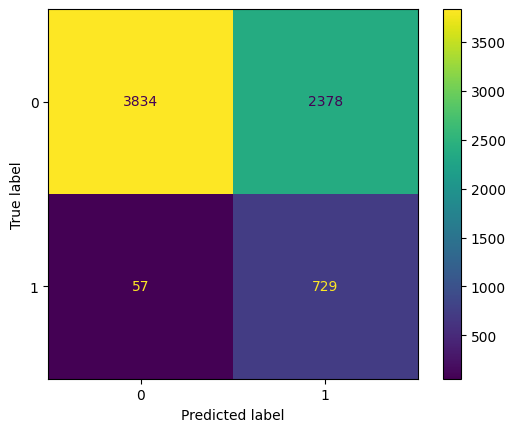

In [71]:
print('Confusion Matrix - Optimised Params')
plot_confusion_matrix(y_actuals=y_test, y_preds=y_cv_test_preds)

ROC AUC Curves - Optimised Params
ROCAUC score: 0.8742


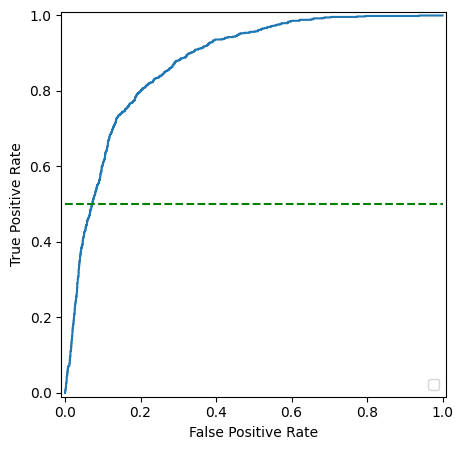

In [72]:
print('ROC AUC Curves - Optimised Params')
plot_rocauc_curve(y_actuals=y_test, y_probs=y_cv_test_probs)

### 12. Feature Importance

In [73]:
import shap

In [74]:
explainer = shap.TreeExplainer(model_opt.fit(X_train, y_train))
shap_values = explainer.shap_values(X_test)

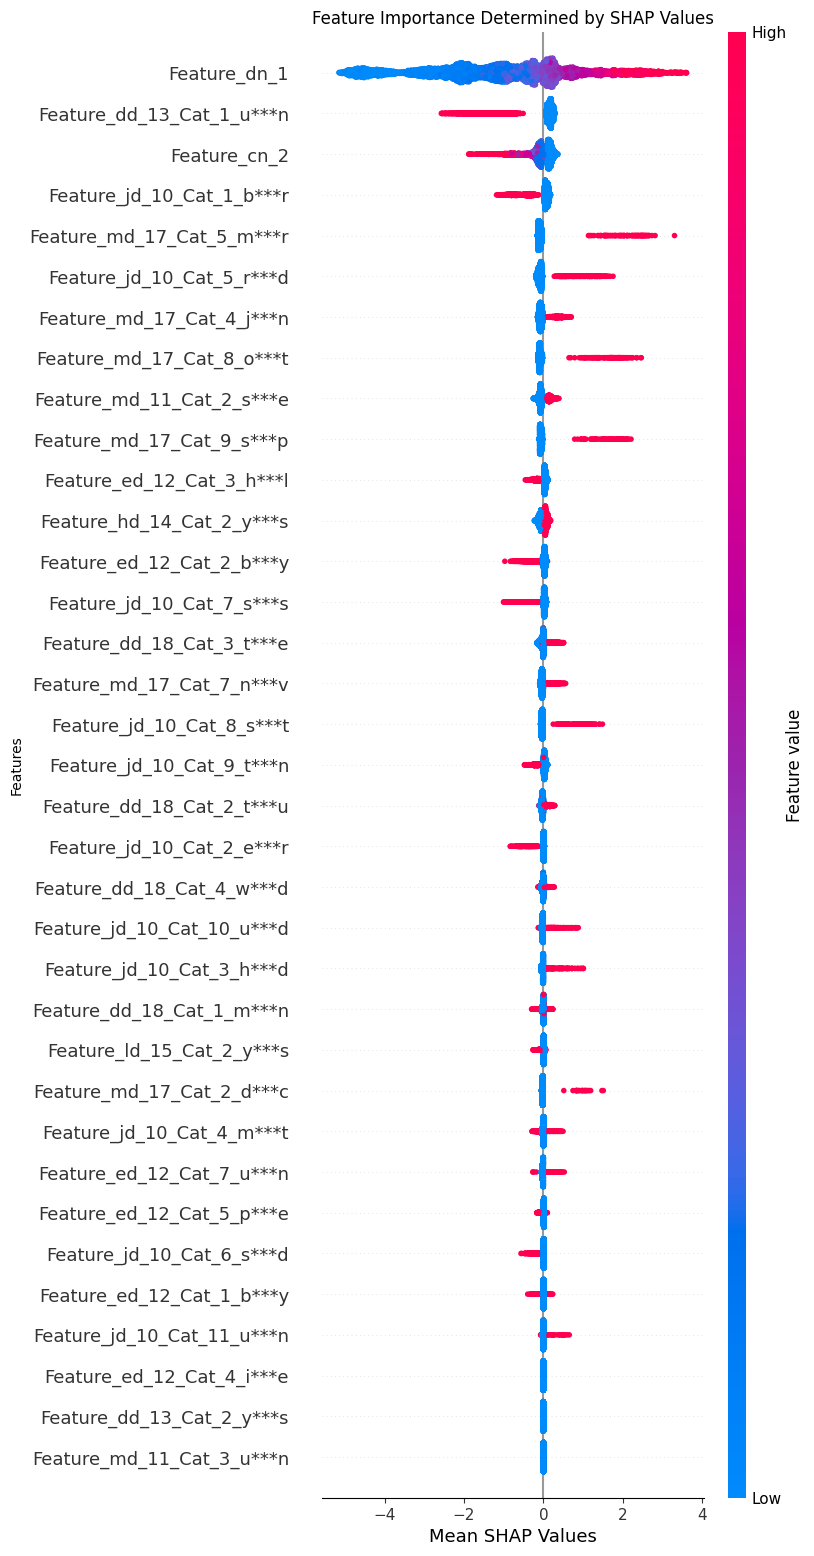

In [75]:
fig = shap.summary_plot(shap_values, X_test, show=False, class_names=['High Adapativity','Moderate Adaptivity', 'Low Adaptivity'], max_display = len(X_test.columns))
plt.title('Feature Importance Determined by SHAP Values')
plt.xlabel('Mean SHAP Values')
plt.ylabel('Features')
plt.show()

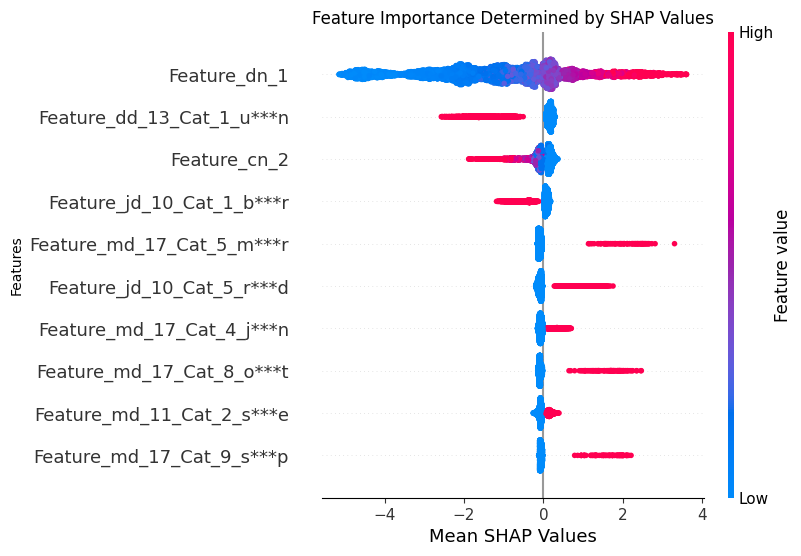

In [76]:
fig = shap.summary_plot(shap_values, X_test, show=False, class_names=['High Adapativity','Moderate Adaptivity', 'Low Adaptivity'], max_display = 10)
plt.title('Feature Importance Determined by SHAP Values')
plt.xlabel('Mean SHAP Values')
plt.ylabel('Features')
plt.show()

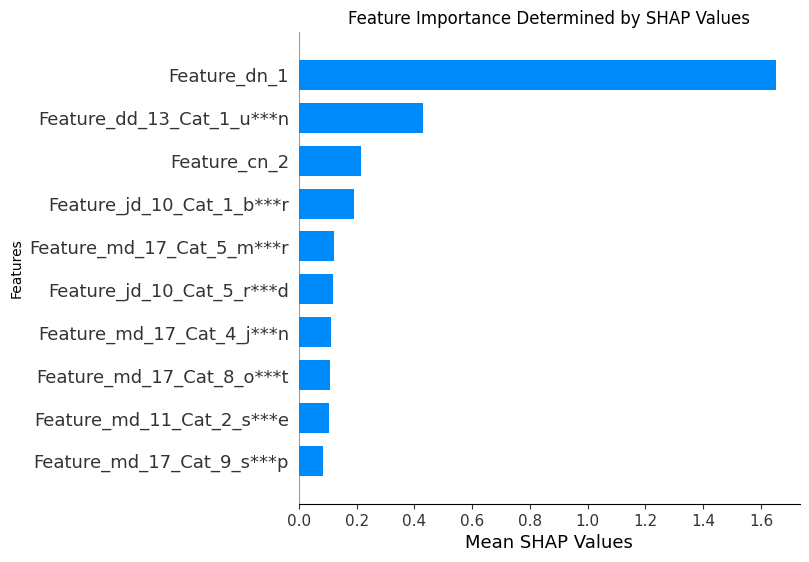

In [77]:
fig = shap.summary_plot(shap_values, X_test, show=False, class_names=['High Adapativity','Moderate Adaptivity', 'Low Adaptivity'], max_display = 10, plot_type='bar')
plt.title('Feature Importance Determined by SHAP Values')
plt.xlabel('Mean SHAP Values')
plt.ylabel('Features')
plt.show()